# Task 1 - Iris Flowers Classification

# Name - Rohit Arjun Badhai 

# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
%matplotlib inline

# Loading Dataset

In [2]:
iris = pd.read_csv("Iris.csv")

# Understanding the Data

In [3]:
iris.shape  #no. of rows and columns

(150, 6)

In [4]:
iris.head()  #returns first five rows of a dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# Data info

In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
iris.isnull() #returns a dataframe object where all value are replaced by a boolean value True for null and false for not null

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
145,False,False,False,False,False,False
146,False,False,False,False,False,False
147,False,False,False,False,False,False
148,False,False,False,False,False,False


In [9]:
iris.isnull().sum()    #returns a no. of missing values in dataset

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [11]:
iris.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

In [12]:
iris.Species.nunique()

3

In [13]:
iris['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

# Data Visualization

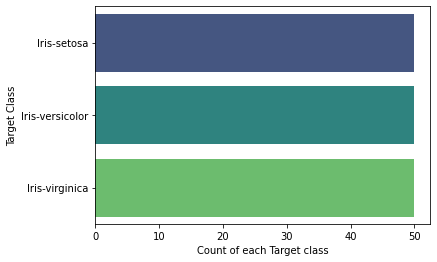

In [14]:
# Check the distribution of target variable to see if it's a case of unbalanced class
sns.countplot(y = 'Species', data = iris, palette="viridis")
plt.xlabel("Count of each Target class")
plt.ylabel("Target Class")
plt.show()

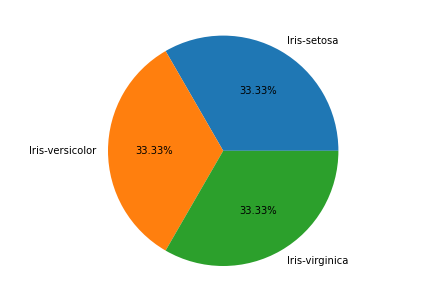

In [15]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l = ['Iris-setosa', 
'Iris-versicolor' , 
'Iris-virginica']
s=[50,50,50]
ax.pie(s , labels = l , autopct = '%1.2f%%')
plt.show()

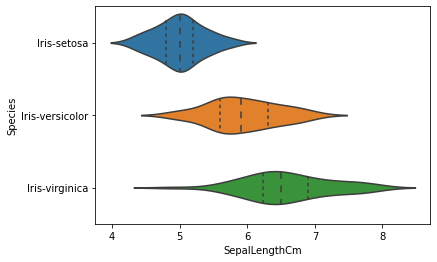

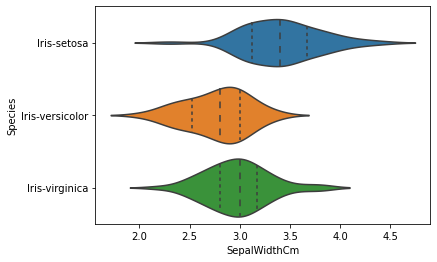

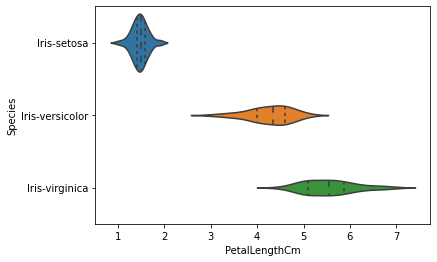

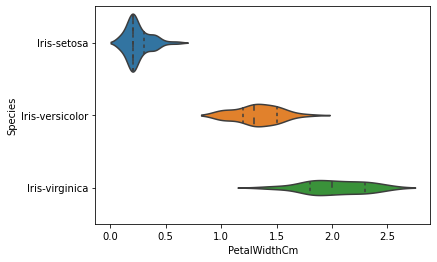

In [16]:
sns.violinplot(y='Species', x='SepalLengthCm', data=iris, inner='quartile')
plt.show()
sns.violinplot(y='Species', x='SepalWidthCm', data=iris, inner='quartile')
plt.show()
sns.violinplot(y='Species', x='PetalLengthCm', data=iris, inner='quartile')
plt.show()
sns.violinplot(y='Species', x='PetalWidthCm', data=iris, inner='quartile')
plt.show()

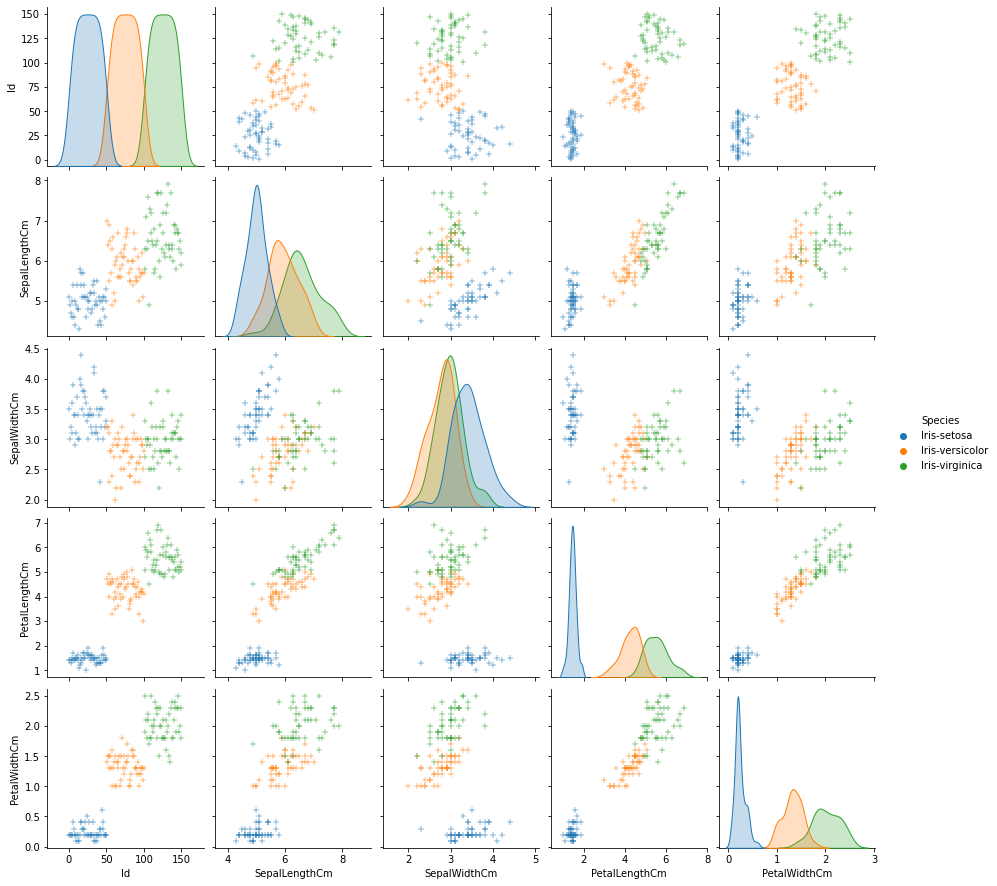

In [17]:
sns.pairplot(iris, hue='Species', markers='+')
plt.show()

# Correlation Matrix

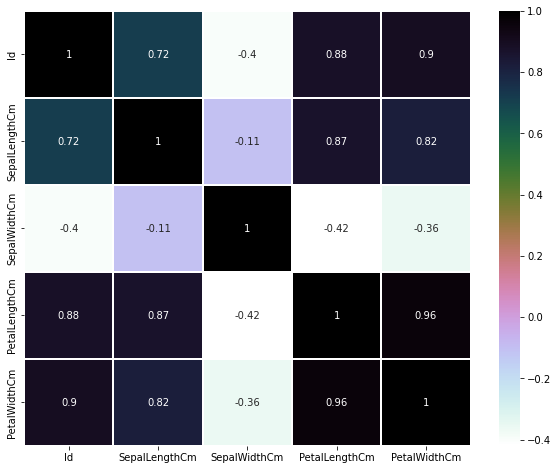

In [18]:
plt.figure(figsize=(10,8))
sns.heatmap(iris.corr(), annot=True, cmap='cubehelix_r', linewidths=0.4)
plt.show()

# Loading Classification Technique (Supervised Machine Learning Models)

In [19]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report


In [20]:
lr=LogisticRegression()
knn=KNeighborsClassifier()
svm=SVC()
nb=GaussianNB()


# Train and Test Split

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
train,test =train_test_split(iris,test_size=0.25)
print(train.shape)
print(test.shape)

(112, 6)
(38, 6)


Model Building

In [23]:
train_X = iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
train_y=iris.Species
test_X= iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
test_y=iris.Species

In [24]:
train_X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [25]:
test_y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

# Logistic Regression

Accuracy:  0.9733333333333334
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        50
Iris-versicolor       0.94      0.98      0.96        48
 Iris-virginica       0.98      0.94      0.96        52

       accuracy                           0.97       150
      macro avg       0.97      0.97      0.97       150
   weighted avg       0.97      0.97      0.97       150



C:\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


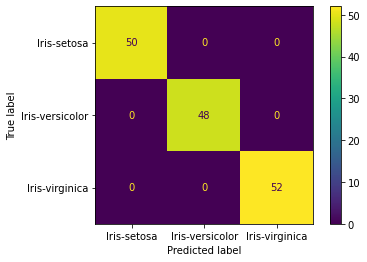

In [26]:
model = lr
model.fit(train_X,train_y)
prediction = model.predict(test_X)
s1=accuracy_score(prediction,test_y)
print('Accuracy: ',s1)

print(classification_report(prediction,test_y))
metrics.plot_confusion_matrix(model , test_X,prediction)

# Support Vector Machine

Accuracy:  0.9733333333333334
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        50
Iris-versicolor       0.96      0.96      0.96        50
 Iris-virginica       0.96      0.96      0.96        50

       accuracy                           0.97       150
      macro avg       0.97      0.97      0.97       150
   weighted avg       0.97      0.97      0.97       150



C:\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


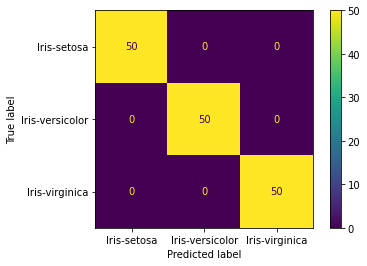

In [27]:
model = svm
model.fit(train_X,train_y)
prediction = model.predict(test_X)
s2=accuracy_score(prediction,test_y)
print('Accuracy: ',s2)


print(classification_report(prediction,test_y))
metrics.plot_confusion_matrix(model , test_X,prediction)

# KNeighborsClassifier

Accuracy:  0.9666666666666667
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        50
Iris-versicolor       0.94      0.96      0.95        49
 Iris-virginica       0.96      0.94      0.95        51

       accuracy                           0.97       150
      macro avg       0.97      0.97      0.97       150
   weighted avg       0.97      0.97      0.97       150



C:\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


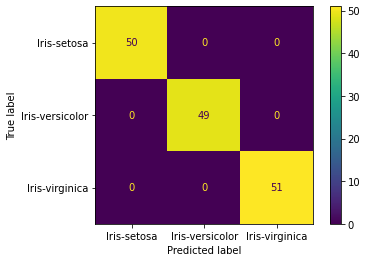

In [28]:
model = knn
model.fit(train_X,train_y)
prediction = model.predict(test_X)
s3=accuracy_score(prediction,test_y)
print('Accuracy: ',s3)


print(classification_report(prediction,test_y))
metrics.plot_confusion_matrix(model , test_X,prediction)

# GaussianNB

Accuracy:  0.96
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        50
Iris-versicolor       0.94      0.94      0.94        50
 Iris-virginica       0.94      0.94      0.94        50

       accuracy                           0.96       150
      macro avg       0.96      0.96      0.96       150
   weighted avg       0.96      0.96      0.96       150



C:\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


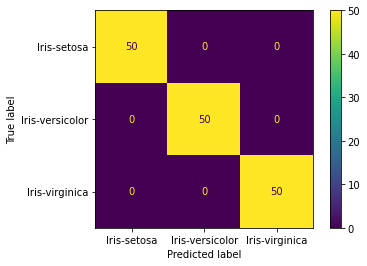

In [29]:
model = nb
model.fit(train_X,train_y)
prediction = model.predict(test_X)
s4=accuracy_score(prediction,test_y)
print('Accuracy: ',s4)


print(classification_report(prediction,test_y))
metrics.plot_confusion_matrix(model , test_X,prediction)

In [30]:
score=pd.DataFrame({'Score' : [s1,s2,s3,s4], 
                    'Model_Name' : ['Logistic regression', 'Support Vector Machines','KNeighborsClassifier','GaussianNB']
                   })
score_iris=score.sort_values(by='Score',ascending=True)
score_iris = score_iris.set_index('Score')
score_iris.head()

,Model_Name
Score,
0.960000,GaussianNB
0.966667,KNeighborsClassifier
0.973333,Logistic regression
0.973333,Support Vector Machines
